In [2]:
# This notebook covers examples of how the MaterialsCoord infrastructure can be used to 
# test CN algorithms.

%matplotlib inline
from materialscoord.cn_methods import TestVoronoiCoordFinder, TestECoN, TestVoronoiCoordFinder_mod
from materialscoord.core import Benchmark
import pandas as pd
pd.set_option('max_colwidth',100)

# Method specific parameters can be defined like this:
tvcf_params = {"cutoff": 10.0}
tecon_parmas = {"radius": 10.0}

# Prepare a list of CN methods we want to compare:
# Note we are passing the paras we defined above to respective CN methods.
methods = [TestVoronoiCoordFinder(params=tvcf_params), 
           TestECoN(params=tecon_parmas),
           TestVoronoiCoordFinder_mod()]

# Initialization of the Benchmark infrastructure
bm = Benchmark(methods, structure_groups=["common_binaries"], nround=1)

# Perform benchmark calculations with methods specified
bm.benchmark()

Initialization successful.


In [3]:
# Default report output. Returns a pandas dframe where for each structure, the output of the CN algorithms tested is
# given for each unique site.
# For example: [(Al, {u'Al': 0.0, u'O': 5.8}), (O, {u'Al': 3.9, u'O': 0.0})]
#              Here the first site is has an Al atom, which is coordinated by 0.0 Al atoms, and 5.8 O atoms.

bm.report()

,TestECoN,TestVoronoiCoordFinder,TestVoronoiCoordFinder_mod
Al2O3_corundum,"[(Al, {u'Al': 0.0, u'O': 5.8}), (O, {u'Al': 3.9, u'O': 0.0})]","[(Al, {u'Al': 0.0, u'O': 5.3}), (O, {u'Al': 3.5, u'O': 1.8})]","[(Al, {u'O': 6.0}), (O, {u'Al': 4.0})]"
CaF2_fluorite,"[(Ca, {u'Ca': 0.0, u'F': 8.0}), (F, {u'Ca': 5.0, u'F': 2.6})]","[(Ca, {u'F': 8.0}), (F, {u'Ca': 4.0, u'F': 4.0})]","[(Ca, {u'F': 8.0}), (F, {u'Ca': 4.0, u'F': 6.0})]"
CsCl,"[(Cs, {u'Cs': 2.1, u'Cl': 9.2}), (Cl, {u'Cs': 9.2, u'Cl': 2.1})]","[(Cs, {u'Cs': 2.2, u'Cl': 8.0}), (Cl, {u'Cs': 8.0, u'Cl': 2.2})]","[(Cs, {u'Cl': 8.0}), (Cl, {u'Cs': 8.0})]"
Fe3O4_spinel,"[(Fe, {u'Fe': 0.0, u'O': 6.0}), (Fe, {u'Fe': 0.0, u'O': 4.0}), (O, {u'Fe': 3.7, u'O': 0.0})]","[(Fe, {u'O': 6.0}), (Fe, {u'Fe': 0.2, u'O': 4.2}), (O, {u'Fe': 3.2, u'O': 1.1})]","[(Fe, {u'O': 6.0}), (Fe, {u'O': 4.0}), (O, {u'Fe': 4.0})]"
MgAl2O4_spinel,"[(Mg, {u'Mg': 0.0, u'Al': 0.0, u'O': 4.0}), (Al, {u'Mg': 0.0, u'Al': 0.0, u'O': 6.0}), (O, {u'Mg...","[(Mg, {u'Mg': 0.3, u'O': 4.3}), (Al, {u'O': 6.0}), (O, {u'Mg': 1.1, u'Al': 2.3, u'O': 1.2})]","[(Mg, {u'O': 4.0}), (Al, {u'O': 6.0}), (O, {u'Mg': 1.0, u'Al': 3.0})]"
NaCl_rocksalt,"[(Na, {u'Na': 0.0, u'Cl': 6.0}), (Cl, {u'Na': 6.0, u'Cl': 0.0})]","[(Na, {u'Na': 0.0, u'Cl': 6.0}), (Cl, {u'Na': 6.0, u'Cl': 0.0})]","[(Na, {u'Cl': 6.0}), (Cl, {u'Na': 6.0})]"
TiO2_anatase,"[(Ti, {u'O': 6.0, u'Ti': 0.0}), (O, {u'O': 0.1, u'Ti': 3.1})]","[(Ti, {u'O': 5.8}), (O, {u'O': 2.9, u'Ti': 2.9})]","[(Ti, {u'O': 6.0}), (O, {u'Ti': 3.0})]"
ZnS_wurtzite,"[(Zn, {u'Zn': 0.0, u'S': 4.0}), (S, {u'Zn': 4.0, u'S': 0.0})]","[(Zn, {u'Zn': 0.3, u'S': 4.0}), (S, {u'Zn': 4.0, u'S': 0.3})]","[(Zn, {u'S': 4.0}), (S, {u'Zn': 4.0})]"
ZnS_zincblende,"[(Zn, {u'Zn': 0.0, u'S': 4.0}), (S, {u'Zn': 4.0, u'S': 0.0})]","[(Zn, {u'Zn': 0.5, u'S': 4.0}), (S, {u'Zn': 4.0, u'S': 0.5})]","[(Zn, {u'S': 4.0}), (S, {u'Zn': 4.0})]"


In [4]:
# We can instead ask to get only the total number of coordinating atoms around each unique site.
# For example: [(Al, 5.8), (O, 3.9)]
#               Here the first site is Al, and it has in total 5.8 coordinating atoms around.
bm.report(totals=True)

,TestECoN,TestVoronoiCoordFinder,TestVoronoiCoordFinder_mod
Al2O3_corundum,"[(Al, 5.8), (O, 3.9)]","[(Al, 5.3), (O, 5.3)]","[(Al, 6.0), (O, 4.0)]"
CaF2_fluorite,"[(Ca, 8.0), (F, 7.6)]","[(Ca, 8.0), (F, 8.0)]","[(Ca, 8.0), (F, 10.0)]"
CsCl,"[(Cs, 11.3), (Cl, 11.3)]","[(Cs, 10.2), (Cl, 10.2)]","[(Cs, 8.0), (Cl, 8.0)]"
Fe3O4_spinel,"[(Fe, 6.0), (Fe, 4.0), (O, 3.7)]","[(Fe, 6.0), (Fe, 4.4), (O, 4.3)]","[(Fe, 6.0), (Fe, 4.0), (O, 4.0)]"
MgAl2O4_spinel,"[(Mg, 4.0), (Al, 6.0), (O, 4.1)]","[(Mg, 4.6), (Al, 6.0), (O, 4.6)]","[(Mg, 4.0), (Al, 6.0), (O, 4.0)]"
NaCl_rocksalt,"[(Na, 6.0), (Cl, 6.0)]","[(Na, 6.0), (Cl, 6.0)]","[(Na, 6.0), (Cl, 6.0)]"
TiO2_anatase,"[(Ti, 6.0), (O, 3.2)]","[(Ti, 5.8), (O, 5.8)]","[(Ti, 6.0), (O, 3.0)]"
ZnS_wurtzite,"[(Zn, 4.0), (S, 4.0)]","[(Zn, 4.3), (S, 4.3)]","[(Zn, 4.0), (S, 4.0)]"
ZnS_zincblende,"[(Zn, 4.0), (S, 4.0)]","[(Zn, 4.5), (S, 4.5)]","[(Zn, 4.0), (S, 4.0)]"


In [5]:
# The separate_columns option can be with totals=True if you want a dframe that rather prints the total CN of each
# site in a separate column, up to max_sites unique sites in the structure. Therefore the output will have
# max_sites columns for each CN method. Each column will be labeled as NameOfCNMethod-SiteIndex.
p = bm.report(totals=True, separate_columns=True, max_sites=4)
p

,TestECoN0,TestECoN1,TestECoN2,TestECoN3,TestVoronoiCoordFinder0,TestVoronoiCoordFinder1,TestVoronoiCoordFinder2,TestVoronoiCoordFinder3,TestVoronoiCoordFinder_mod0,TestVoronoiCoordFinder_mod1,TestVoronoiCoordFinder_mod2,TestVoronoiCoordFinder_mod3
Al2O3_corundum,5.8,3.9,0.0,0,5.3,5.3,0.0,0,6.0,4.0,0.0,0
CaF2_fluorite,8.0,7.6,0.0,0,8.0,8.0,0.0,0,8.0,10.0,0.0,0
CsCl,11.3,11.3,0.0,0,10.2,10.2,0.0,0,8.0,8.0,0.0,0
Fe3O4_spinel,6.0,4.0,3.7,0,6.0,4.4,4.3,0,6.0,4.0,4.0,0
MgAl2O4_spinel,4.0,6.0,4.1,0,4.6,6.0,4.6,0,4.0,6.0,4.0,0
NaCl_rocksalt,6.0,6.0,0.0,0,6.0,6.0,0.0,0,6.0,6.0,0.0,0
TiO2_anatase,6.0,3.2,0.0,0,5.8,5.8,0.0,0,6.0,3.0,0.0,0
ZnS_wurtzite,4.0,4.0,0.0,0,4.3,4.3,0.0,0,4.0,4.0,0.0,0
ZnS_zincblende,4.0,4.0,0.0,0,4.5,4.5,0.0,0,4.0,4.0,0.0,0


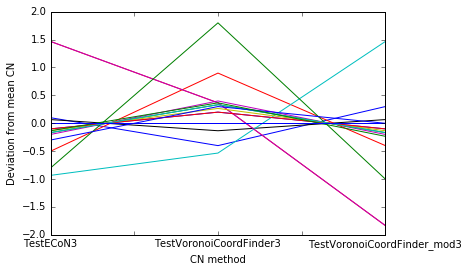

In [6]:
# Here is an example for plotting deviation of CNs for unique sites in our test structures 
# from the mean CN of that site among all methods.

ax = None
for i in range(4):
    a = p[ ["TestECoN"+str(i), "TestVoronoiCoordFinder"+str(i), "TestVoronoiCoordFinder_mod"+str(i)] ]
    if ax:
        a.sub(a.mean(axis=1), axis='rows').T.plot(legend=False, ax=ax)
    else:
        ax=a.sub(a.mean(axis=1), axis='rows').T.plot(legend=False)
ax.set_xlabel("CN method")
ax.set_ylabel("Deviation from mean CN")